In [1]:
%load_ext autoreload
%autoreload 2

from ryn.common import helper
helper.notebook()

changing directory


In [8]:
from ryn.graphs import split
from ryn.graphs import loader

# g = loader.load_graphs_from_uri('cde.m-trainvalidtest')[0]
g = loader.load_graphs_from_uri('oke.fb15k237-trainvalidtest')[0]

print(f'loaded {g.str_stats}')

rels = split.Relation.from_graph(g)
rels.sort(key=lambda rel: rel.ratio)
print(f'retrieved {len(rels)} relations')

loaded ryn graph: oke.fb15k237-trainvalidtest
  nodes: 14541
  edges: 310116 (237 types)
  degree:
    mean 42.65
    median 26

retrieved 237 relations


In [9]:
from tabulate import tabulate

rows = [(i, r.r, r.ratio, len(r.hs), len(r.ts), r.name) for i, r in enumerate(rels, 1)]

N = 10

print(f'first {N}')
print(tabulate(rows[:N]))

# print(f'mid {N}')
# m = len(rows) / 2
# print(tabulate(rows[int(m-N/2):int(m+N/2)]))

# print(f'last {N}')
# print(tabulate(rows[-N:]))

first 10
--  ---  -----------  ----  -  ---------------------------------------------------------------------------------------------------
 1   25  0.000229148  4364  1  /common/topic/webpage./common/webpage/category
 2   43  0.000441501  4530  2  /people/person/gender
 3  120  0.0010352     966  1  /location/hud_foreclosure_area/estimated_number_of_mortgages./measurement_unit/dated_integer/source
 4   85  0.00119976   3334  4  /people/person/spouse_s./people/marriage/type_of_union
 5  118  0.0020284     493  1  /user/tsegaran/random/taxonomy_subject/entry./user/tsegaran/random/taxonomy_entry/taxonomy
 6   33  0.00218341    458  1  /location/statistical_region/rent50_2./measurement_unit/dated_money_value/currency
 7   11  0.00307503   1626  5  /film/film/release_date_s./film/film_regional_release_date/film_release_distribution_medium
 8  110  0.0037594     266  1  /tv/tv_producer/programs_produced./tv/tv_producer_term/producer_type
 9   34  0.00475867   1471  7  /film/film/estimated_b

In [10]:
N, M = 10, 5

# i=28 r.r=43 0.2353 P50:author

gen =  rels[:N]
# gen = [r for r in rels if r.name in whitelist]

for i, r in enumerate(gen, 1):
    print(f'\n{i=} {r.r=} {r.ratio:2.4f} {r.name[:100]} {len(r.triples)=}')
    ents = r.hs if len(r.hs) < len(r.ts) else r.ts
    for e in list(ents)[:M]:
        print('    ', f'{e=}', g.source.ents[e])


i=1 r.r=25 0.0002 /common/topic/webpage./common/webpage/category len(r.triples)=4364
     e=62 /m/08mbj5d

i=2 r.r=43 0.0004 /people/person/gender len(r.triples)=4530
     e=384 female organism
     e=141 male organism

i=3 r.r=120 0.0010 /location/hud_foreclosure_area/estimated_number_of_mortgages./measurement_unit/dated_integer/source len(r.triples)=966
     e=791 United States Department of Housing and Urban Development

i=4 r.r=85 0.0012 /people/person/spouse_s./people/marriage/type_of_union len(r.triples)=3557
     e=1665 domestic partnership
     e=434 marriage
     e=12077 civil union
     e=11461 common-law marriage

i=5 r.r=118 0.0020 /user/tsegaran/random/taxonomy_subject/entry./user/tsegaran/random/taxonomy_entry/taxonomy len(r.triples)=493
     e=774 Library of Congress Classification

i=6 r.r=33 0.0022 /location/statistical_region/rent50_2./measurement_unit/dated_money_value/currency len(r.triples)=458
     e=90 United States dollar

i=7 r.r=11 0.0031 /film/film/release_d

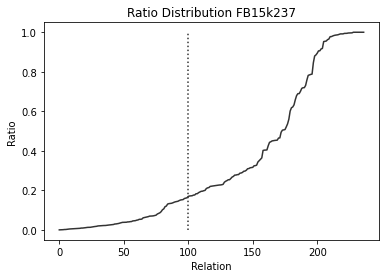

In [12]:
# name, threshold = "CoDEx-M", 27
name, threshold = "FB15k237", 100

import ryn
from ryn.common import plotter

path = ryn.ENV.SPLIT_DIR / f'{g.name}.ratio'
path.parent.mkdir(exist_ok=True, parents=True)

plt = plotter.Plotter(title=f'Ratio Distribution {name or g.name}', xlabel='Relation', ylabel='Ratio', fname=str(path))
plt.ax.plot(range(len(rels)), [r.ratio for r in rels], color=plotter.CLR[0]) # , marker=".")
plt.ax.vlines(threshold, 0, 1, color=plotter.CLR[0], linestyle='dotted')

print()
plt.plot()
print()